<a href="https://colab.research.google.com/github/ejrtks1020/machine-learning-basic/blob/main/_9_%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [ ]:
from sklearn.datasets import load_breast_cancer, load_iris, load_wine, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [ ]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0012143611907958984 +/- 0.0005209766111858242
avg score time: 0.0018162727355957031 +/- 0.00011189591250873413
avg test score: 0.96 +/- 0.024944382578492935


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019796323776245118 +/- 0.001610231677005094
avg score time: 0.008720636367797852 +/- 0.0011898629503278545
avg test score: 0.9466666666666667 +/- 0.02666666666666666


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0013329029083251954 +/- 0.0005618400991181097
avg score time: 0.0020955085754394533 +/- 0.0001207074816085966
avg test score: 0.9493650793650794 +/- 0.037910929811115976


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.021373462677001954 +/- 0.006822630337829282
avg score time: 0.008843946456909179 +/- 0.0022689553418297594
avg test score: 0.9606349206349206 +/- 0.02908099392402141


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0021256923675537108 +/- 0.00030352078141385327
avg score time: 0.006989479064941406 +/- 0.0002893679920087992
avg test score: 0.9648501785437045 +/- 0.009609970350036127


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023631811141967773 +/- 0.004536350070077043
avg score time: 0.015155553817749023 +/- 0.0004520584004746361
avg test score: 0.9648657040832168 +/- 0.01105922006392283


#### SVC

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017896175384521484 +/- 0.0007139768515874297
avg score time: 0.0005360603332519531 +/- 7.652197972377068e-05
avg test score: 0.9666666666666666 +/- 0.02108185106778919


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02598857879638672 +/- 0.002263923806955216
avg score time: 0.0029039382934570312 +/- 3.654452106791616e-05
avg test score: 0.96 +/- 0.024944382578492935


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002266407012939453 +/- 0.0005633460822516076
avg score time: 0.0005434989929199219 +/- 3.283971657989417e-05
avg test score: 0.9833333333333334 +/- 0.022222222222222233


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026480484008789062 +/- 0.001360204722303176
avg score time: 0.003369569778442383 +/- 0.00012309900111150086
avg test score: 0.9777777777777779 +/- 0.020786985482077462


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
   SVC()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006429433822631836 +/- 0.0009237573675602423
avg score time: 0.0016711235046386718 +/- 0.00042197155715843776
avg test score: 0.9736376339077782 +/- 0.014678541667933545


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03608903884887695 +/- 0.0022444213628767624
avg score time: 0.00680999755859375 +/- 0.00017020417653363789
avg test score: 0.9613258810743673 +/- 0.014282179995099694


#### Decision Tree

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0019481658935546875 +/- 0.0016300510442176016
avg score time: 0.0004637718200683594 +/- 0.0001594024897858671
avg test score: 0.9600000000000002 +/- 0.03265986323710903


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02436237335205078 +/- 0.002663949367375744
avg score time: 0.0024318695068359375 +/- 0.0002709163648365566
avg test score: 0.9399999999999998 +/- 0.04898979485566355


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015864849090576171 +/- 0.0002082444228713454
avg score time: 0.0003948688507080078 +/- 3.0141012179096634e-05
avg test score: 0.8765079365079365 +/- 0.04835046741937931


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022955799102783205 +/- 0.00043361083089987507
avg score time: 0.002306556701660156 +/- 5.92886367921397e-05
avg test score: 0.9328571428571429 +/- 0.04860513406726857


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008750247955322265 +/- 0.000711774626395979
avg score time: 0.0005488395690917969 +/- 2.7071167195395938e-05
avg test score: 0.9208818506443098 +/- 0.01588516877836336


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03504819869995117 +/- 0.002042729855294725
avg score time: 0.002529478073120117 +/- 3.598986693432531e-05
avg test score: 0.9595714951094549 +/- 0.016286979149119907


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [ ]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00196380615234375 +/- 0.0008909586172492914
avg score time: 0.002315998077392578 +/- 0.0007300171796283548
avg test score: 0.47357748833823543 +/- 0.13243123464477455


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01882905960083008 +/- 0.002582064706959196
avg score time: 0.009859561920166016 +/- 0.000471838572268409
avg test score: 0.4655474574798113 +/- 0.14745340353317565


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0019731521606445312 +/- 0.0015826224490582618
avg score time: 0.00247955322265625 +/- 0.0011063946858368553
avg test score: 0.3689720650295623 +/- 0.044659049060165365


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017477035522460938 +/- 0.0007390599087366879
avg score time: 0.008843088150024414 +/- 0.00018461239388414016
avg test score: 0.4269718703187998 +/- 0.030669442814358603


#### SVR

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015035438537597656 +/- 0.00023826758371652177
avg score time: 0.002327251434326172 +/- 1.948123447395766e-05
avg test score: 0.17631266230186618 +/- 0.5224914915128981


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.051465940475463864 +/- 0.0028651020035065965
avg score time: 0.008423995971679688 +/- 0.00012492782282077123
avg test score: 0.14204005594170913 +/- 0.29960942133561047


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.011381864547729492 +/- 0.002096264272621514
avg score time: 0.0019884586334228517 +/- 0.00014319542920183728
avg test score: 0.14659936199629434 +/- 0.02190798003342928


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.039826154708862305 +/- 0.0011360906525897765
avg score time: 0.007078409194946289 +/- 0.0002472376064593828
avg test score: 0.04999873190131869 +/- 0.038239963908045016


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0054263114929199215 +/- 0.0015622850621597783
avg score time: 0.0008261680603027343 +/- 4.135951483527201e-05
avg test score: 0.10604114352400798 +/- 0.9551821794484185


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.029232311248779296 +/- 0.0019082519859664252
avg score time: 0.0025766849517822265 +/- 0.00019842807036808406
avg test score: 0.5132156185017184 +/- 0.14360813553129023


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_estimator=base_model , n_estimators=10,max_samples = 0.5, max_features=  0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0038499355316162108 +/- 0.0012413891740489231
avg score time: 0.0008498668670654297 +/- 0.000409054822171904
avg test score: -0.11940722574737028 +/- 0.09867599574703992


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028264713287353516 +/- 0.0026404251362920836
avg score time: 0.0024630546569824217 +/- 7.962943547542619e-05
avg test score: 0.3859771103955009 +/- 0.0426147982311224


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13269195556640626 +/- 0.004573260805097156
avg score time: 0.00950922966003418 +/- 0.0013839034352720852
avg test score: 0.96 +/- 0.024944382578492935


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13927721977233887 +/- 0.006551802831341956
avg score time: 0.00841507911682129 +/- 0.0004207141191575606
avg test score: 0.9663492063492063 +/- 0.0109581305359322


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19898123741149903 +/- 0.0033446349000683206
avg score time: 0.009607076644897461 +/- 0.001311626680278626
avg test score: 0.9595870206489675 +/- 0.023260843919092566


### Random Forests 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3209834098815918 +/- 0.008222820768566402
avg score time: 0.008539819717407226 +/- 0.0006468527013252681
avg test score: 0.6384532895891638 +/- 0.20612914935419582


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2595914363861084 +/- 0.004063658174569486
avg score time: 0.009089422225952149 +/- 0.0012110198150020774
avg test score: 0.42460592537147057 +/- 0.050670085580689486


### Extremely Randomized Trees 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09331026077270507 +/- 0.0010664351972517088
avg score time: 0.008201313018798829 +/- 7.263724773745306e-05
avg test score: 0.9533333333333334 +/- 0.03399346342395189


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09804491996765137 +/- 0.003003414790904298
avg score time: 0.009638500213623048 +/- 0.002117203051478249
avg test score: 0.9776190476190475 +/- 0.01119469694127331


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11413750648498536 +/- 0.002123359745064067
avg score time: 0.009393787384033203 +/- 6.022674166872485e-05
avg test score: 0.9683589504735288 +/- 0.01628336762232602


### Extremely Randomized Trees 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19131927490234374 +/- 0.0061144168914605305
avg score time: 0.008677339553833008 +/- 0.0007425608648469082
avg test score: 0.6200567858638008 +/- 0.27796756506988596


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16102685928344726 +/- 0.0032000910471640144
avg score time: 0.008844947814941407 +/- 0.00035394233726226694
avg test score: 0.4320841206638753 +/- 0.04209601728352008


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step  =0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [ ]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth = None),
          RandomForestClassifier(n_estimators= n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

In [ ]:
iris.data.shape

(150, 4)

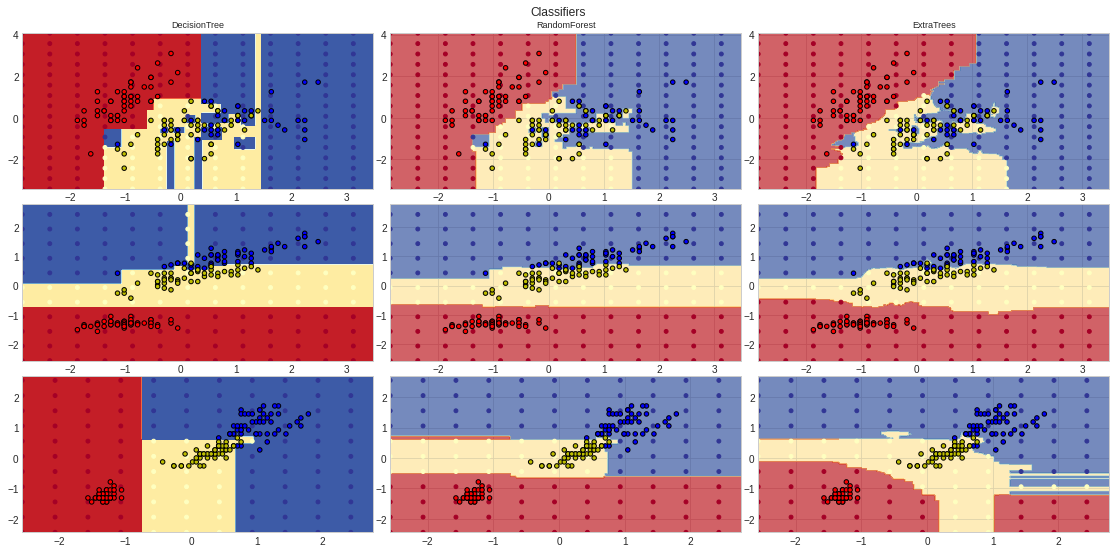

In [ ]:
plt.figure(figsize=(16,8))

for pair in [(0,1), [0,2],[2,3]]:
  for model in models:
    X= iris.data[:,pair]
    y = iris.target
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std
    
    model.fit(X,y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title , fontsize = 9)

    x_min, x_max = X[:,0].min() -1 , X[:,0].max() +1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx,yy,Z, cmap =cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
         Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
         Z = Z.reshape(xx.shape)
         cs = plt.contourf(xx,yy,Z,alpha = estimator_alpha ,cmap =cmap)
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                                 np.arange(y_min, y_max , plot_step_coarser))    
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s = 15, c = Z_points_coarser, cmap =cmap,
                          edgecolor =None)
    plt.scatter(X[:, 0],X[:, 1], c =y, cmap = ListedColormap(['r','y','b']),
              edgecolor = 'k', s = 20)
    plot_idx += 1
 
plt.suptitle('Classifiers', fontsize =12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2 ,pad = 2.5)
plt.show()


In [ ]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

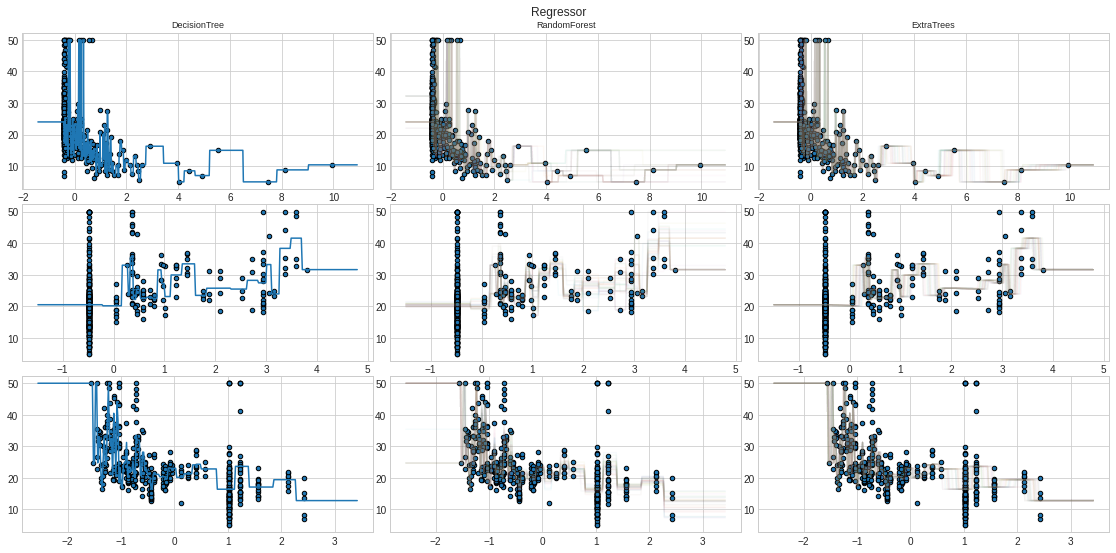

In [ ]:
plt.figure(figsize = (16,8))
for pair in (0, 1 ,2):
  for model in models:
    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)

    X = (X - mean) /std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3,plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)
    x_min, x_max = X.min() -1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1

    xx, yy = np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha = estimator_alpha)

    plt.scatter(X, y, edgecolors = 'k', s =20)
    plot_idx +=1

plt.suptitle('Regressor', fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()



## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.055275583267211915 +/- 0.002069071105476252
avg score time: 0.006281852722167969 +/- 0.0005253309366909312
avg test score: 0.9466666666666667 +/- 0.03399346342395189


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06489996910095215 +/- 0.001689056465457201
avg score time: 0.0061743736267089845 +/- 9.626684454505752e-05
avg test score: 0.8085714285714285 +/- 0.16822356718459935


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.131315279006958 +/- 0.006164636710188873
avg score time: 0.0066566944122314455 +/- 0.00013845001171063705
avg test score: 0.9718677224033534 +/- 0.0195587047134823


### AdaBoost 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08007745742797852 +/- 0.0034207132416405757
avg score time: 0.0037351131439208986 +/- 3.427706358579788e-05
avg test score: 0.5932069492554171 +/- 0.2109518699857982


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06758675575256348 +/- 0.009876787450648019
avg score time: 0.0036239147186279295 +/- 6.088174225430768e-05
avg test score: 0.4229531187465206 +/- 0.04465495042498639


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15438737869262695 +/- 0.011793931049417474
avg score time: 0.0010954856872558594 +/- 0.00033181656470269516
avg test score: 0.9666666666666668 +/- 0.02108185106778919


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19104228019714356 +/- 0.0070736465097604
avg score time: 0.0007876396179199219 +/- 1.6312849376848334e-05
avg test score: 0.9385714285714286 +/- 0.032068206474093704


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.38797941207885744 +/- 0.0039466329328755245
avg score time: 0.0008719921112060547 +/- 0.00013641198541902228
avg test score: 0.9631268436578171 +/- 0.02027905296701261


### Gradient Tree Boosting 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10805959701538086 +/- 0.0032286791814494648
avg score time: 0.0008091926574707031 +/- 1.520804072393468e-05
avg test score: 0.6817769303197819 +/- 0.15241071430175324


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X =diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0826941967010498 +/- 0.004403276134287109
avg score time: 0.0009346485137939453 +/- 0.00017916609101561952
avg test score: 0.40833097128866436 +/- 0.06999866176843886


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)



In [ ]:
for model in (model1, model2, model3, vote_model):

  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print('Accuracy: %0.2f (+/2 %0.2f)[%s]'% (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/2 0.02)[SVC]
Accuracy: 0.95 (+/2 0.03)[GaussianNB]
Accuracy: 0.96 (+/2 0.02)[RandomForestClassifier]
Accuracy: 0.97 (+/2 0.02)[VotingClassifier]


In [ ]:
model1 = SVC(probability = True)
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights = [2,1,2]
)


In [ ]:
for model in (model1, model2, model3, vote_model):

  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print('Accuracy: %0.2f (+/2 %0.2f)[%s]'% (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/2 0.02)[SVC]
Accuracy: 0.95 (+/2 0.03)[GaussianNB]
Accuracy: 0.97 (+/2 0.02)[RandomForestClassifier]
Accuracy: 0.96 (+/2 0.02)[VotingClassifier]


### 결정 경계 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [ ]:
X = iris.data[:, [0,2]]
y = iris.target

In [ ]:
model1 = DecisionTreeClassifier(max_depth =4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma = .1, kernel = 'rbf', probability=True)
vote_model = VotingClassifier(estimators= [('dt', model1), ('knn', model),('svc', model3)], voting = 'soft', weights = [2, 1, 2])

model1 = model1.fit(X,y)
model2=  model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [ ]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

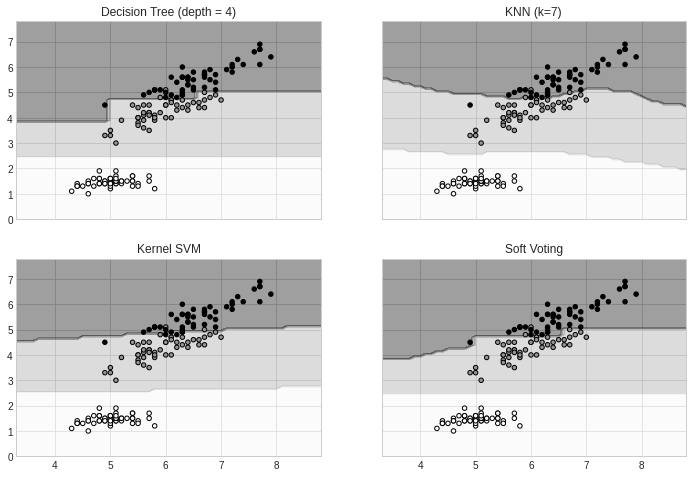

In [ ]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey= 'row', figsize= (12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth = 4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha = 0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s= 20 , edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1,1,1]
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv = 5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.20) [RandomForestRegressor]
R2: 0.65 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [ ]:
X  = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [ ]:
x_min, x_max = X.min()-1, X.max() +1
xx = np.arange(x_min, x_max, 0.1)

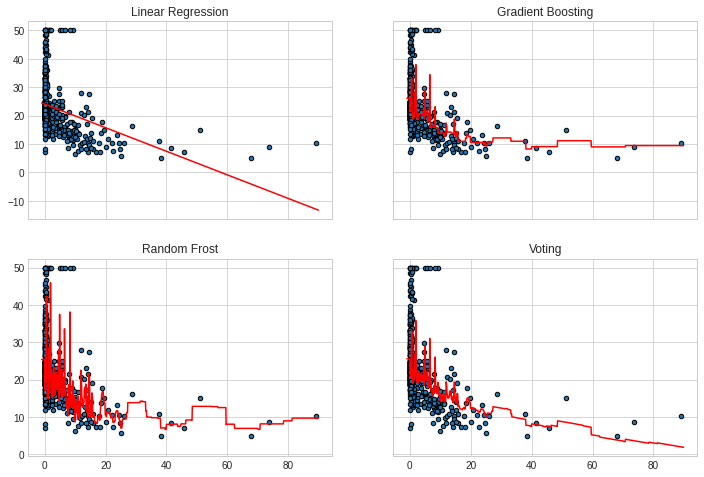

In [ ]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey= 'row', figsize = (12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression' , 'Gradient Boosting', 'Random Frost', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c = 'r')
  axarr[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()


## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [('ridge', Ridge()),
            ('lasso', Lasso()),
            ('svr', SVR())]

In [ ]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(estimators = estimators,
                      final_estimator =GradientBoostingRegressor())

)

In [ ]:
cross_val = cross_validate(
    estimator = reg,
    X =boston.data, y = boston.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11389589309692383 +/- 0.003193608172206569
avg score time: 0.0024011611938476564 +/- 0.00017561456149756214
avg test score: 0.31885451974654655 +/- 0.33660858490385626


#### 회귀식 시각화

In [ ]:
X  = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [ ]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()

reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(estimators = estimators,
                      final_estimator =GradientBoostingRegressor())

)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

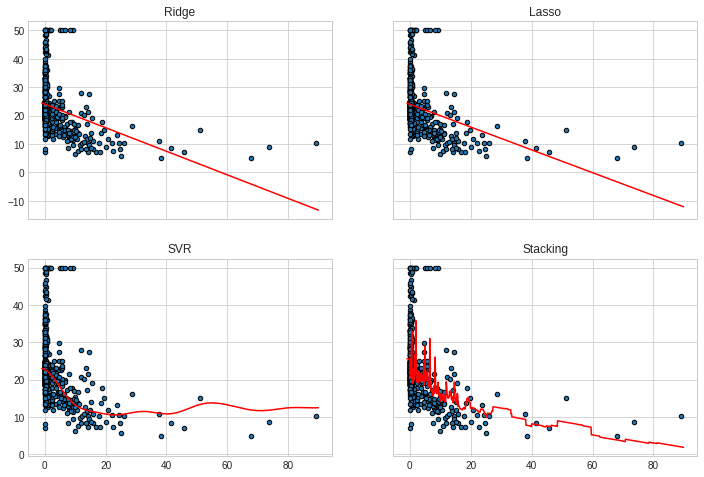

In [ ]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey= 'row', figsize = (12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge' , 'Lasso', 'SVR', 'Stacking']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c = 'r')
  axarr[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('logistic',LogisticRegression(max_iter =1000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [ ]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = clf,
    X =iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} +/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} +/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} +/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26477527618408203 +/- 0.011833601459454736
avg score time: 0.009543418884277344 +/- 0.0010394987381737474
avg test score: 0.9733333333333334 +/- 0.02494438257849294


#### 결정 경계 시각화

In [ ]:
X = iris.data[:, [0,2]]
y = iris.target

In [ ]:
model1 = LogisticRegression(max_iter = 10000)
model2 = SVC()
model3 = GaussianNB()
stacking = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2=  model2.fit(X,y)
model3 = model3.fit(X,y)
stacking = stacking.fit(X,y)

In [ ]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

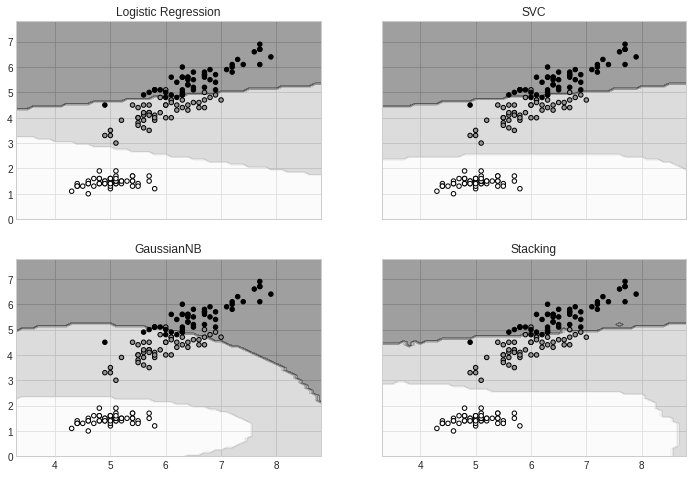

In [ ]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey= 'row', figsize= (12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stacking],
                          ['Logistic Regression', 'SVC',
                           'GaussianNB', 'Stacking']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha = 0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s= 20 , edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

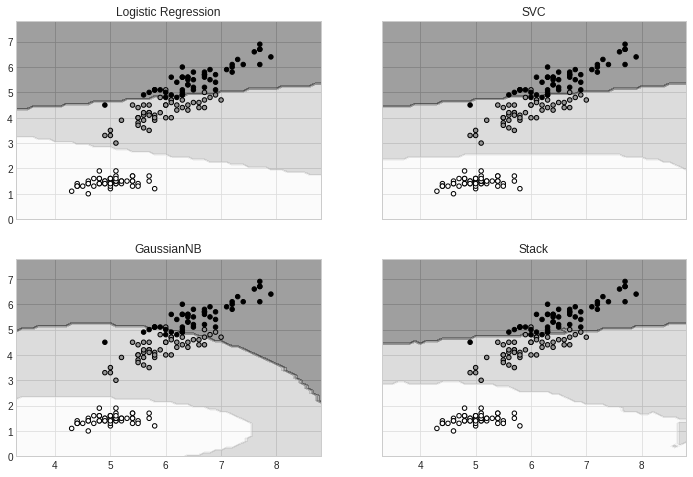